In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 2.1 MB/s 
     |████████████████████████████████| 6.6 MB 38.6 MB/s 
     |████████████████████████████████| 163 kB 53.6 MB/s 


In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [ ]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Label:  9


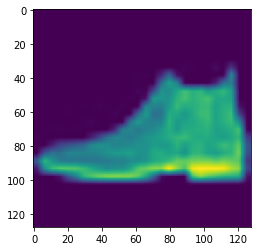

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose
import os
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from torchvision import datasets
import torch.nn.functional as F
import torch.optim as optim

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.Compose(
    [
        transforms.Resize((128,128)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
    ]
))
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.Compose(
    [
        transforms.Resize((128,128)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
    ]
))
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

img, label = test_data[0]
plt.imshow(img[0])
print('Label: ',label)

In [ ]:
img.shape

torch.Size([3, 128, 128])

In [ ]:
for idx, (image, label) in enumerate(loop):
  print(label)
  break

In [ ]:
import random, torch, os, numpy as np
import torch.nn as nn
import copy

def save_checkpoint(model, optimizer, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }
    torch.save(checkpoint, filename)


def load_checkpoint(checkpoint_file, model, optimizer, lr):
    print("=> Loading checkpoint")
    checkpoint = torch.load(checkpoint_file, map_location=config.DEVICE)
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    # If we don't do this then it will just have learning rate of old checkpoint
    # and it will lead to many hours of debugging \:
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr


def seed_everything(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Block(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size, stride , padding, use_act = True, downsample = True, **kwargs):
    super(Block, self).__init__()
    self.use_act = use_act
    self.downsample = downsample
    if downsample:
      self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias = False, **kwargs)
    else:
      self.conv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias = False, **kwargs)
    self.bn = nn.BatchNorm2d(out_channels, momentum=0.1,  eps=0.8)
    if use_act:
      self.act = nn.ReLU()
    else:
      self.act = nn.LeakyReLU(0.2)

  def forward(self, x):
    return self.act(self.bn(self.conv(x)))

class Generator(nn.Module):
  def __init__(self, noise_dim = 100, n_classes = 10, embedding_dim = 100):
    super(Generator, self).__init__()
    self.initial_layer = nn.Sequential(
      nn.Embedding(n_classes, embedding_dim),
      nn.Linear(embedding_dim, 16),
    )

    self.latent = nn.Sequential(
      nn.Linear(noise_dim, 4*4*512),
      nn.LeakyReLU(0.2, inplace = True),
    )

    self.model = nn.Sequential(
      *[
        Block(513, 64*8, 4, 2, 1, use_act = True, downsample = False),
        Block(64*8, 64*4, 4, 2, 1, use_act = True, downsample = False),
        Block(64*4, 64*2, 4, 2, 1, use_act = True, downsample = False),
        Block(64*2, 64, 4, 2, 1, use_act = True, downsample = False),
        nn.ConvTranspose2d(64*1, 3, 4, 2, 1, bias=False),
        nn.Tanh(),
      ]
    )

  def forward(self, x, label):
    x_1 = self.initial_layer(label)
    x_1 = x_1.view(x_1.shape[0], 1, 4, 4)
    x_2 = self.latent(x)
    x_2 = x_2.view(x_2.shape[0], 512, 4, 4)
    x = torch.cat([x_1, x_2], dim = 1)
    return self.model(x)
  
def test():
    img_size = 128
    x = torch.randn((1,1,100))
    label = torch.randint(0, 10, (1,))
    print(label)
    gen = Generator()
    print(gen(x, label).shape)

if __name__ == "__main__":
    test()

tensor([1])
torch.Size([1, 3, 128, 128])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Block(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size, stride , padding, use_act = True, downsample = True, **kwargs):
    super(Block, self).__init__()
    self.use_act = use_act
    self.downsample = downsample
    if downsample:
      self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias = False, **kwargs)
    else:
      self.conv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias = False, **kwargs)
    self.bn = nn.BatchNorm2d(out_channels, momentum=0.1,  eps=0.8)
    if use_act:
      self.act = nn.ReLU()
    else:
      self.act = nn.LeakyReLU(0.2)
  
  def forward(self, x):
    return self.act(self.bn(self.conv(x)))

class Discriminator(nn.Module):
  def __init__(self, noise_dim = 100, n_classes = 10, embedding_dim = 100):
    super(Discriminator, self).__init__()
    self.label_embedding = nn.Embedding(n_classes, embedding_dim)
    self.linear_layer = nn.Linear(embedding_dim, 3*128*128)

    self.model = nn.Sequential(
      *[
        Block(6, 64, 4, 2, 1, use_act = False, downsample = True),
        Block(64, 64*2, 4, 3, 2, use_act = True, downsample = True),
        Block(64*2, 64*4, 4, 3, 2, use_act = True, downsample = True),
        Block(64*4, 64*8, 4, 3, 2, use_act = True, downsample = True),
        nn.Flatten(),
        nn.Dropout(0.4),
        nn.Linear(4608, 1),
        nn.Sigmoid(),
      ]
    )
  
  def forward(self, x, label):
    x_1 = self.label_embedding(label)
    x_1 = self.linear_layer(x_1)
    x_1 = x_1.view(x_1.shape[0], 3, 128, 128)
    x = torch.cat([x, x_1], dim = 1)
    return self.model(x)
  
def test():
    img_size = 128
    x = torch.randn((1,3,img_size, img_size))
    label = torch.randint(0, 10, (1,))
    print(label)
    disc = Discriminator()
    print(disc(x, label).shape)

if __name__ == "__main__":
    test()

tensor([4])
torch.Size([1, 1])


In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
TRAIN_DIR = "archive"
VAL_DIR = "archive"
BATCH_SIZE = 1
LEARNING_RATE = 1e-5
NUM_WORKERS = 4
NUM_EPOCHS = 10
LOAD_MODEL = True
SAVE_MODEL = True
CHECKPOINT_GEN_H = "genh.pth.tar"
CHECKPOINT_GEN_Z = "genz.pth.tar"
CHECKPOINT_CRITIC_H = "critich.pth.tar"
CHECKPOINT_CRITIC_Z = "criticz.pth.tar"

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose
import os
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from torchvision import datasets
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

train_data = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
))
train_loader = DataLoader(train_data, batch_size=1,
      shuffle=True,
      num_workers=4,
      pin_memory=True)

test_data = datasets.MNIST(root='./data', train = False, download=True, transform=transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
))
test_loader = DataLoader(test_data, batch_size=1,
      shuffle=True,
      num_workers=4,
      pin_memory=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
batch_size = 1
num_epochs = 20
latent_size = 100

In [ ]:
def create_image():
  y = torch.randn(batch_size,latent_size)
  return y

def denorm(x):
  out = (x + 1) / 2
  return out.clamp(0, 1)

In [ ]:
from torchvision.utils import save_image

In [ ]:
def train_func(disc, gen, opt_disc, opt_gen, loader, l1, mse, d_scaler, g_scaler, num_epochs):
  loop = tqdm(loader, leave=True)
  H_reals = 0
  H_fakes = 0
  for idx, (image, label) in enumerate(loop):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    # Train Discriminator for the particular label
    with torch.cuda.amp.autocast():
      fake = gen(create_image().to(DEVICE), label)
      disc_fake = disc(fake, label)
      disc_real = disc(image, label)
      disc_loss = (mse(disc_real, torch.ones_like(disc_real)) + mse(disc_fake, torch.zeros_like(disc_fake))) / 2
    H_reals += disc_loss
    opt_disc.zero_grad()
    d_scaler.scale(disc_loss).backward()
    d_scaler.step(opt_disc)
    d_scaler.update()

    # Train Generator
    with torch.cuda.amp.autocast():
      fake = gen(create_image().to(DEVICE), label)
      disc_fake = disc(fake, label)
      gen_loss = mse(disc_fake, torch.ones_like(disc_fake))
      # l1_loss = l1(fake, image) * config.LAMBDA_CYCLE
      total_loss = gen_loss
    H_fakes += total_loss
    opt_gen.zero_grad()
    g_scaler.scale(total_loss).backward()
    g_scaler.step(opt_gen)
    g_scaler.update()

    loop.set_postfix(disc_loss=disc_loss.item(), gen_loss=gen_loss.item())

    if idx % 200 == 0:
      save_image(denorm(fake.detach()), f"images/{idx}.png")

    loop.set_postfix(H_real=H_reals/(idx+1), H_fake=H_fakes/(idx+1))

def test_func(gen, loader):
  loop = tqdm(loader, leave=True)
  for idx, (image, label) in enumerate(loop):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    fake = gen(create_image().to(DEVICE), label)
    save_image(denorm(fake.detach()), f"test_images/{idx}.png")

In [ ]:
disc = Discriminator(n_classes = 10).to(DEVICE)
gen = Generator(n_classes = 10).to(DEVICE)
opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
l1 = nn.L1Loss()
mse = nn.MSELoss()
d_scaler = torch.cuda.amp.GradScaler()
g_scaler = torch.cuda.amp.GradScaler()
for epoch in range(5):
  train_func(disc, gen, opt_disc, opt_gen, train_loader, l1, mse, d_scaler, g_scaler, 20)
test_func(gen, test_loader)

 78%|███████▊  | 47050/60000 [30:52<08:38, 24.96it/s, disc_loss=0.000181, gen_loss=0.686]                                                                                            

Label:  180


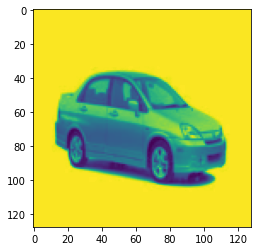

In [ ]:
img, label = test_data[0]
plt.imshow(img[0])
print('Label: ',label)

In [ ]:
PATH = "./model.pt"
torch.save({
            'gen_state_dict': gen.state_dict(),
            'disc_state_dict': disc.state_dict(),
            'opt_gen_state_dict': opt_gen.state_dict(),
            'opt_disc_state_dict': opt_disc.state_dict(),
            }, PATH)

In [ ]:
test_func(gen, test_loader)

100%|██████████| 8041/8041 [01:50<00:00, 72.94it/s]


In [ ]:
from google.colab import files

In [ ]:
files.download("/content/test_images")
files.download("/content/images")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>